In [579]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

DATAFILE = './Marketing-Dataset.csv'
df = pd.read_csv (DATAFILE)
df.head()

,row ID,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state,subscribed
0,Row0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,VIC,0
1,Row1,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NT,0
2,Row2,45,services,married,basic.9y,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,TAS,0
3,Row3,59,admin.,married,professional.course,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NSW,0
4,Row4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,ACT,0


In [580]:
# Save a copy of the original dataframe
original_df = df.copy()
original_df.head()

,row ID,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state,subscribed
0,Row0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,VIC,0
1,Row1,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NT,0
2,Row2,45,services,married,basic.9y,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,TAS,0
3,Row3,59,admin.,married,professional.course,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NSW,0
4,Row4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,ACT,0


### Handling missing values

In [581]:
for column in df.columns:
    missing_count = df[column].isin(['unknown', '?']).sum()
    
    if missing_count > 0:
        print(f"{column} : {missing_count} ")

        missing_percentage = missing_count / len(df)
        print(f"{missing_percentage * 100:.2f}% missing")

job : 212 
0.80% missing
marital : 51 
0.19% missing
education : 1080 
4.10% missing
default : 5551 
21.06% missing
housing : 647 
2.45% missing
loan : 647 
2.45% missing
pdays : 1273 
4.83% missing
emp.var.rate : 821 
3.11% missing
cons.price.idx : 296 
1.12% missing
cons.conf.idx : 248 
0.94% missing
euribor3m : 547 
2.08% missing
nr.employed : 267 
1.01% missing


In [582]:
import numpy as np

for col in df.columns:  
    if col == 'default':
        continue       
    df[col].replace(['unknown', '?'], np.nan, inplace=True)

print(df.isin(['unknown', '?']).sum())

row ID               0
age                  0
job                  0
marital              0
education            0
default           5551
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
state                0
subscribed           0
dtype: int64


C:\Users\micha\AppData\Local\Temp\ipykernel_12768\4035967761.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(['unknown', '?'], np.nan, inplace=True)


In [584]:
# Handle missing values for categorical attributes
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])
# df['default'] = df['default'].fillna(df['default'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df['loan'] = df['loan'].fillna(df['loan'].mode()[0])

print(df['job'].isin(['unknown', '?']).sum())
print(df['marital'].isin(['unknown', '?']).sum())
# print(df['default'].isin(['unknown', '?']).sum())
print(df['education'].isin(['unknown', '?']).sum())
print(df['housing'].isin(['unknown', '?']).sum())
print(df['loan'].isin(['unknown', '?']).sum())

0
0
0
0
0


In [585]:
# Handle missing values for numerical columns
df['pdays'] = pd.to_numeric(df['pdays'], errors='coerce')
numerical_columns = ['pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce') 
    df[column] = df[column].fillna(df[column].mean())

print(df[numerical_columns].isin(['unknown', '?']).sum())

pdays             0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


In [586]:
# Double check for all attributes
# The only "missing" value should be default, as it the "unknown" value will
# be considered as a normal category due to bias

for column in df.columns:
    missing_count = df[column].isin(['unknown', '?']).sum()
    
    if missing_count > 0:
        print(f"{column} : {missing_count} ")

        missing_percentage = missing_count / len(df)
        print(f"{missing_percentage * 100:.2f}% missing")

    print("No missing values")

No missing values
No missing values
No missing values
No missing values
No missing values
default : 5551 
21.06% missing
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values
No missing values


                age      duration      campaign         pdays      previous  \
count  26360.000000  26360.000000  26360.000000  26360.000000  26360.000000   
mean      40.055994    258.799317      2.556639    959.614103      0.173065   
std       10.452764    263.562218      2.715861    189.072700      0.490529   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    179.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  26360.000000    26360.000000   26360.000000  26360.000000   
mean       0.043349       93.565992     -40.524433      3.592770   
std        1.566494        0.576422       4.619289      1.726331   
min       -3.400

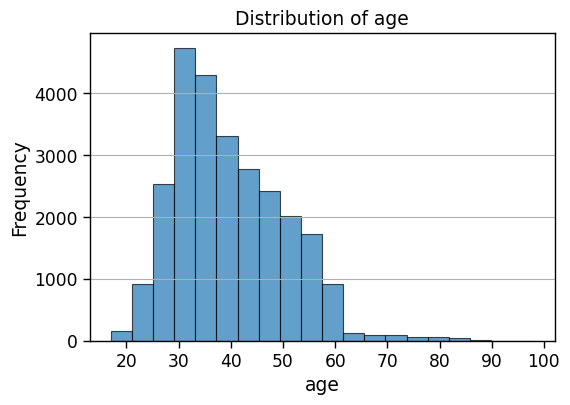

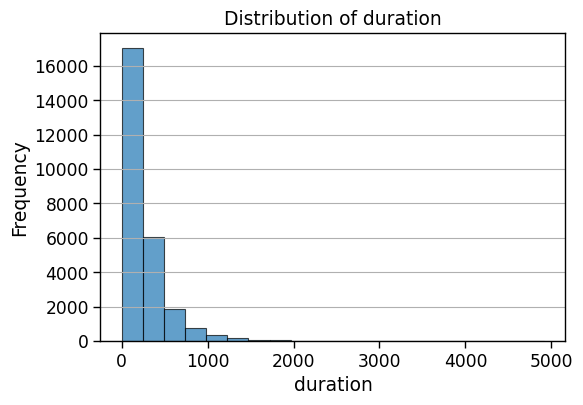

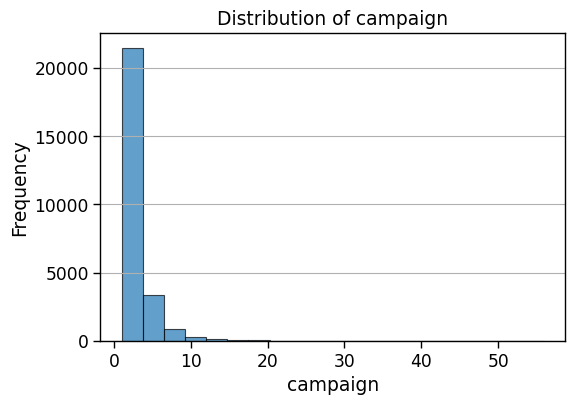

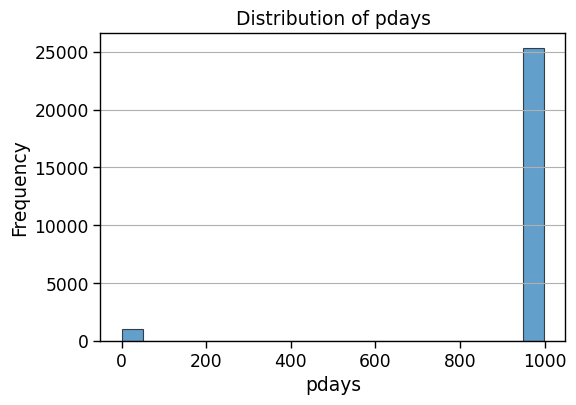

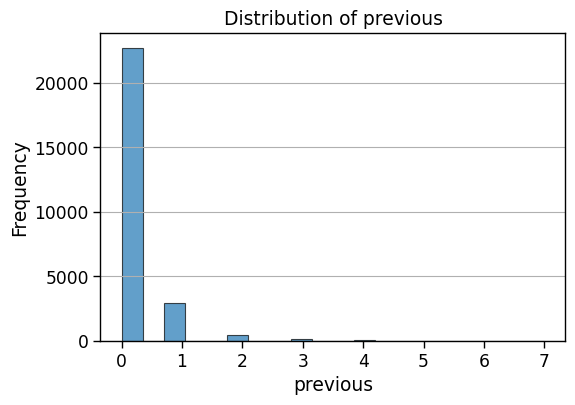

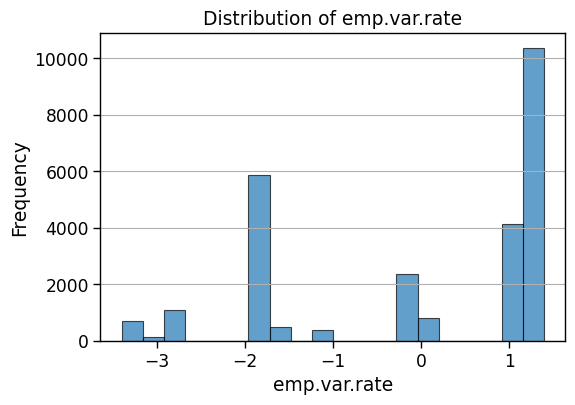

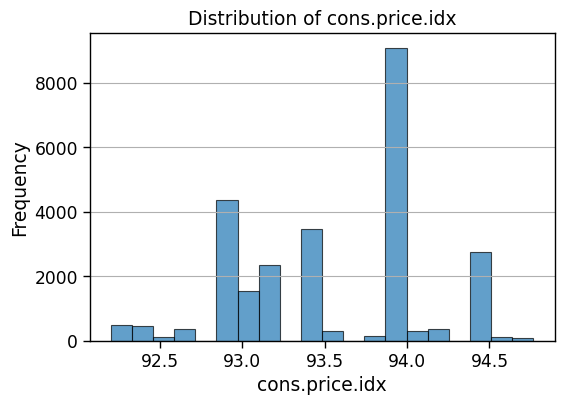

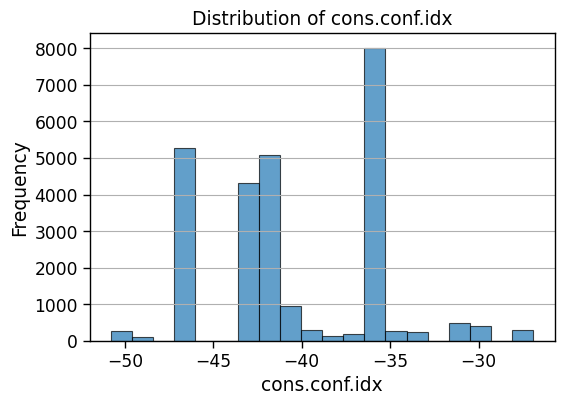

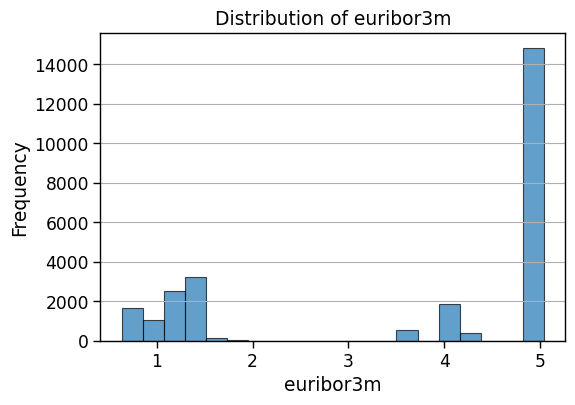

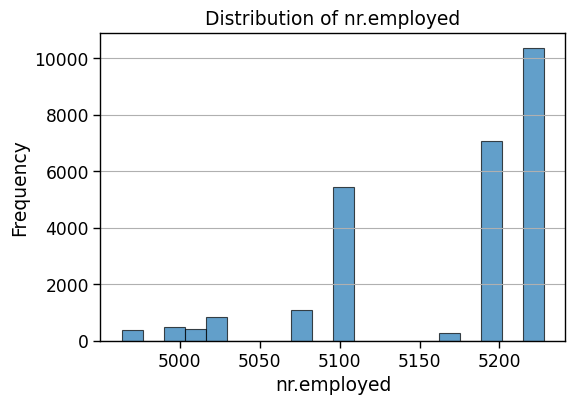

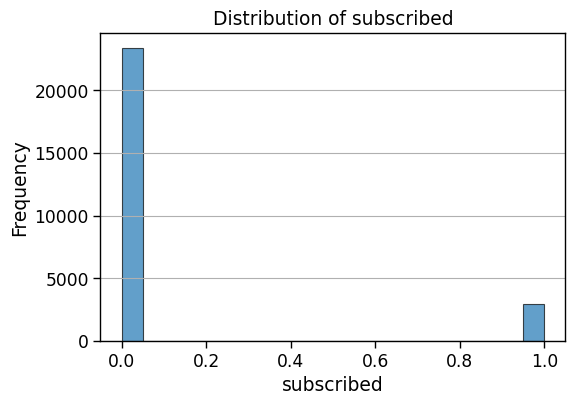

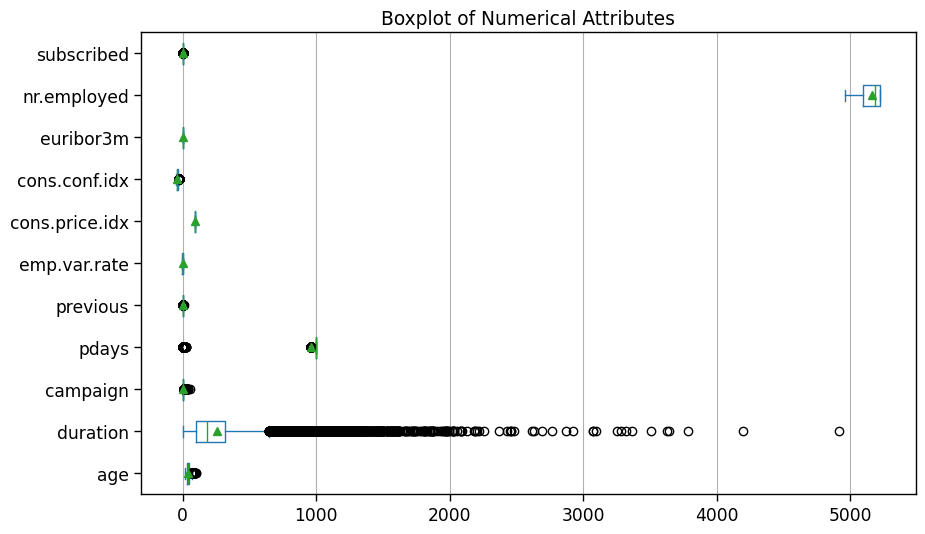

In [587]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_columns = ['age','duration','campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                    'cons.conf.idx', 'euribor3m', 'nr.employed','subscribed']

print(df[numerical_columns].describe())

# Plot histograms
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Plot boxplots
df[numerical_columns].plot(kind='box', figsize=(10, 6), vert=False, showmeans=True)
plt.title("Boxplot of Numerical Attributes")
plt.grid(axis='x')
plt.show()

### Outliers

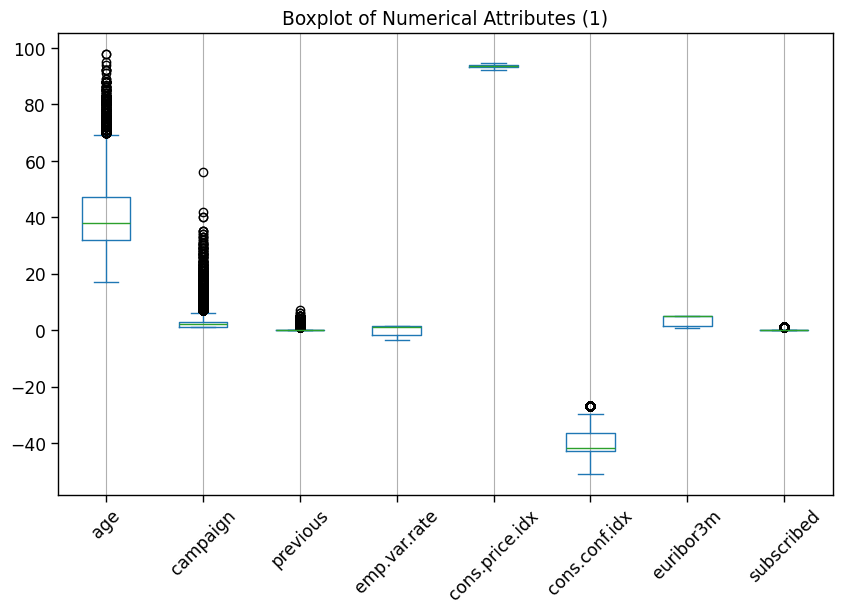

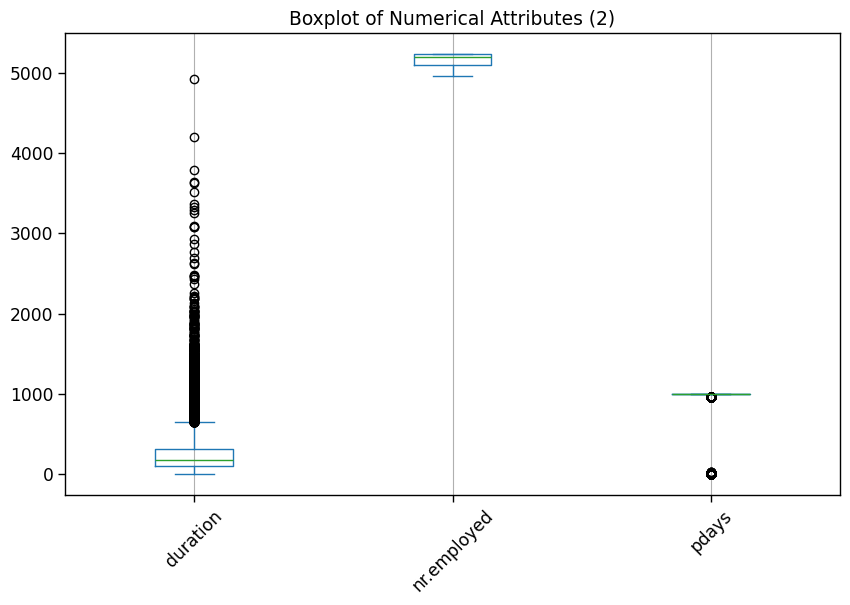

In [588]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['age','campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','subscribed']

df[columns].plot(kind='box', figsize=(10, 6), )
plt.title("Boxplot of Numerical Attributes (1)")
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.show()

columns2 =['duration','nr.employed','pdays']
df[columns2].plot(kind='box', figsize=(10, 6), )
plt.title("Boxplot of Numerical Attributes (2)")
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.show()

### Normalisation

In [589]:
from sklearn.preprocessing import MinMaxScaler

attributes_to_normalize =  ['age','duration','campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                    'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = MinMaxScaler()
df[attributes_to_normalize] = scaler.fit_transform(df[attributes_to_normalize])
print(df[attributes_to_normalize].head())

        age  duration  campaign  pdays  previous  emp.var.rate  \
0  0.481481  0.053070       0.0    1.0       0.0        0.9375   
1  0.481481  0.062424       0.0    1.0       0.0        0.9375   
2  0.345679  0.040260       0.0    1.0       0.0        0.9375   
3  0.518519  0.028264       0.0    1.0       0.0        0.9375   
4  0.296296  0.044124       0.0    1.0       0.0        0.9375   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.698753        0.60251   0.957379     0.859735  
1        0.698753        0.60251   0.957379     0.859735  
2        0.698753        0.60251   0.957379     0.859735  
3        0.698753        0.60251   0.957379     0.859735  
4        0.698753        0.60251   0.957379     0.859735  


### Data transfomation

In [590]:
df.columns

Index(['row ID', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'state', 'subscribed'],
      dtype='object')

In [591]:
df = df.drop(columns=['row ID'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state,subscribed
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,VIC,0
1,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,NT,0
2,0.345679,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,TAS,0
3,0.518519,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,NSW,0
4,0.296296,blue-collar,married,university.degree,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,ACT,0


In [592]:
df['subscribed'].value_counts()

subscribed
0    23396
1     2964
Name: count, dtype: int64

In [593]:
# Perform one-hot encoding for categorical attributes
from sklearn.preprocessing import OneHotEncoder

oneHot = OneHotEncoder(dtype=int, sparse_output=False)

categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
              'day_of_week', 'poutcome', 'state']


onehot_df = oneHot.fit_transform(df[categorical])
encoded_columns = oneHot.get_feature_names_out(categorical)
encoded_df = pd.DataFrame(onehot_df, columns=encoded_columns)

print(encoded_df)
print(encoded_df.shape)
print(encoded_df.sum())

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                0                 0              1   
1               0                0                 0              0   
2               0                0                 0              0   
3               1                0                 0              0   
4               0                1                 0              0   
...           ...              ...               ...            ...   
26355           0                0                 0              0   
26356           0                1                 0              0   
26357           0                0                 0              0   
26358           0                0                 0              0   
26359           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [594]:
encoded_df.shape

(26360, 56)

In [595]:
encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_nonexistent,poutcome_success,state_ACT,state_NSW,state_NT,state_QLD,state_SA,state_TAS,state_VIC,state_WA
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [596]:
df_combined = pd.concat([df, encoded_df], axis=1)
df_combined.drop(categorical, axis=1, inplace=True)

print(df_combined.head())
print(df_combined.shape)
print(df_combined.dtypes)

        age  duration  campaign  pdays  previous  emp.var.rate  \
0  0.481481  0.053070       0.0    1.0       0.0        0.9375   
1  0.481481  0.062424       0.0    1.0       0.0        0.9375   
2  0.345679  0.040260       0.0    1.0       0.0        0.9375   
3  0.518519  0.028264       0.0    1.0       0.0        0.9375   
4  0.296296  0.044124       0.0    1.0       0.0        0.9375   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  \
0        0.698753        0.60251   0.957379     0.859735  ...   
1        0.698753        0.60251   0.957379     0.859735  ...   
2        0.698753        0.60251   0.957379     0.859735  ...   
3        0.698753        0.60251   0.957379     0.859735  ...   
4        0.698753        0.60251   0.957379     0.859735  ...   

   poutcome_nonexistent  poutcome_success  state_ACT  state_NSW  state_NT  \
0                     1                 0          0          0         0   
1                     1                 0          0      

### Linear correlation

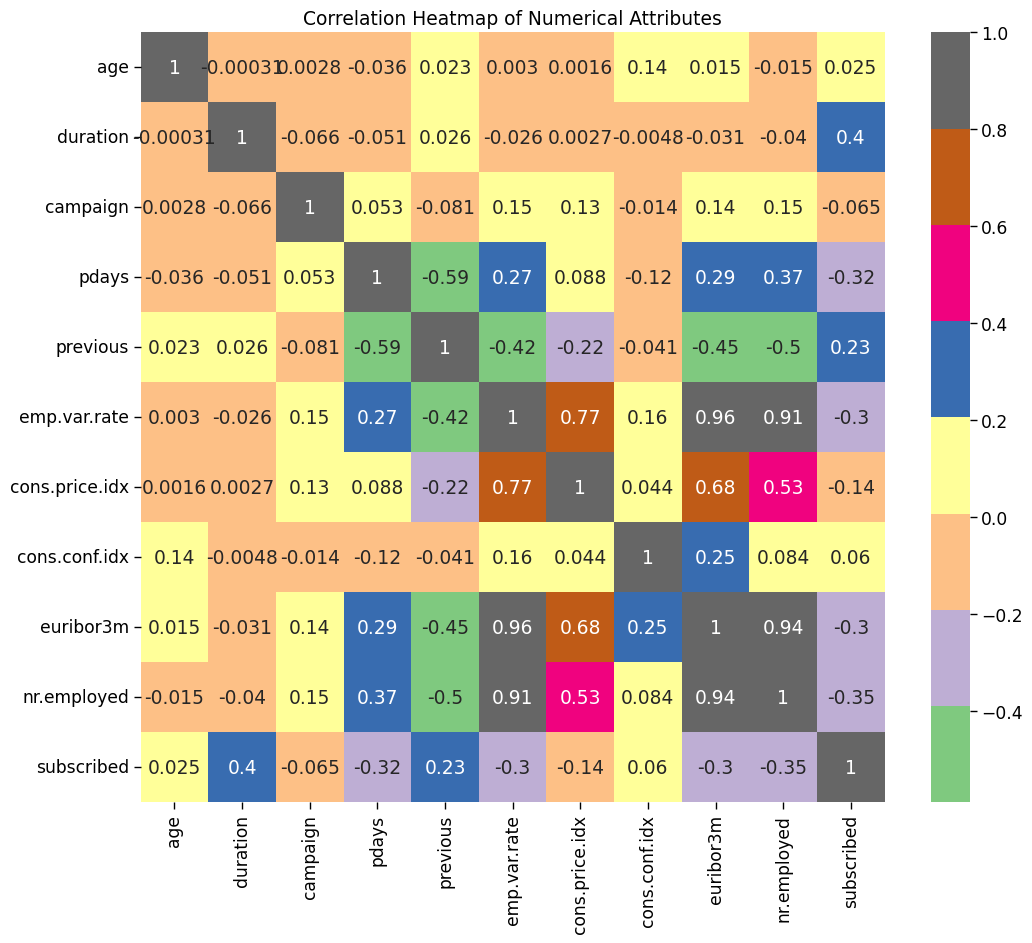

In [597]:
import seaborn as sns
import matplotlib.pyplot as plt

num_attributes = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']

corr_matrix = df_combined[num_attributes].corr()
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, cmap='Accent')

plt.title("Correlation Heatmap of Numerical Attributes")
plt.show()

In [598]:
print(df_combined.dtypes)

age          float64
duration     float64
campaign     float64
pdays        float64
previous     float64
              ...   
state_QLD      int32
state_SA       int32
state_TAS      int32
state_VIC      int32
state_WA       int32
Length: 67, dtype: object


### Feature selection

In [599]:
# Drop columns that have very weak correlation, keep columns with strong-moderate negative/positive correlation 
# associated with the target value

drop_columns = ['age', 'campaign', 'cons.price.idx', 'cons.conf.idx']
df_preprocessed = df_combined.drop(columns=drop_columns)
print("Remaining columns:", df_preprocessed.columns)

Remaining columns: Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'subscribed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed',

In [600]:
df_preprocessed.shape

(26360, 63)

In [601]:
print(df_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration                       26360 non-null  float64
 1   pdays                          26360 non-null  float64
 2   previous                       26360 non-null  float64
 3   emp.var.rate                   26360 non-null  float64
 4   euribor3m                      26360 non-null  float64
 5   nr.employed                    26360 non-null  float64
 6   subscribed                     26360 non-null  int64  
 7   job_admin.                     26360 non-null  int32  
 8   job_blue-collar                26360 non-null  int32  
 9   job_entrepreneur               26360 non-null  int32  
 10  job_housemaid                  26360 non-null  int32  
 11  job_management                 26360 non-null  int32  
 12  job_retired                    26360 non-null 

### Splitting training and test set

In [602]:
X = df_preprocessed.drop(columns=['subscribed'])  # Features = drop the 'subscribed' column only
y = df_preprocessed['subscribed']                 # Target = 'subscribed'

X
y

0        0
1        0
2        0
3        0
4        0
        ..
26355    0
26356    0
26357    0
26358    1
26359    0
Name: subscribed, Length: 26360, dtype: int64

#### Training and test set

In [184]:
from sklearn.model_selection import train_test_split

# 30% of the data will be used as the test set, and the remaining 70% will be used as the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.info()
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Index: 18452 entries, 21553 to 20553
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration                       18452 non-null  float64
 1   pdays                          18452 non-null  float64
 2   previous                       18452 non-null  float64
 3   emp.var.rate                   18452 non-null  float64
 4   euribor3m                      18452 non-null  float64
 5   nr.employed                    18452 non-null  float64
 6   job_admin.                     18452 non-null  int32  
 7   job_blue-collar                18452 non-null  int32  
 8   job_entrepreneur               18452 non-null  int32  
 9   job_housemaid                  18452 non-null  int32  
 10  job_management                 18452 non-null  int32  
 11  job_retired                    18452 non-null  int32  
 12  job_self-employed              18452 non-null  

(18452, 61)

In [185]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (18452, 61)
y_train: (18452,)
X_test: (7908, 61)
y_test: (7908,)


#### Test, train, validate set

In [603]:
from sklearn.model_selection import train_test_split

# Initial split into training + testing (70% training, 30% testing)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split training into training + validation (75% training, 25% validation of 70% training data)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, 
                                                            stratify=y_train_full)

print("X Training Set:", X_train.shape)
print("X Validation Set:", X_validate.shape)
print("X Test Set:", X_test.shape)

print("\ny Training Set:", y_train.shape)
print("y Validation Set:", y_validate.shape)
print("y Test Set:", y_test.shape)

X Training Set: (13839, 62)
X Validation Set: (4613, 62)
X Test Set: (7908, 62)

y Training Set: (13839,)
y Validation Set: (4613,)
y Test Set: (7908,)


### SMOTE resampling

In [604]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", y_train.value_counts())
print("\nResampled dataset shape:", y_train_smote.value_counts())

Original dataset shape: subscribed
0    12283
1     1556
Name: count, dtype: int64

Resampled dataset shape: subscribed
0    12283
1    12283
Name: count, dtype: int64


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Decision tree

In [605]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf_dt = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15, min_samples_split=2, 
                                class_weight="balanced", random_state=42)
clf_dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=15,
                       random_state=42)

In [606]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisation of GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=clf_dt,
    param_grid=param_grid,
    scoring="f1_macro",  
    cv=5,             
    verbose=1,
    n_jobs=-1          
)


grid_search_dt.fit(X_train_smote, y_train_smote)

print("\nBest parameters found:", grid_search_dt.best_params_)

best_dt_model = grid_search_dt.best_estimator_

y_pred_dt = best_dt_model.predict(X_test)
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7019
           1       0.44      0.87      0.58       889

    accuracy                           0.86      7908
   macro avg       0.71      0.86      0.75      7908
weighted avg       0.92      0.86      0.88      7908



In [607]:
from sklearn.metrics import classification_report
y_pred_dt = clf_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7019
           1       0.44      0.87      0.58       889

    accuracy                           0.86      7908
   macro avg       0.71      0.86      0.75      7908
weighted avg       0.92      0.86      0.88      7908



[Text(0.4523809523809524, 0.9166666666666666, 'x[0] <= 0.041\ngini = 0.5\nsamples = 24566\nvalue = [12283, 12283]'),
 Text(0.19047619047619047, 0.75, 'x[5] <= 0.512\ngini = 0.262\nsamples = 8952\nvalue = [7564, 1388]'),
 Text(0.3214285714285714, 0.8333333333333333, 'True  '),
 Text(0.09523809523809523, 0.5833333333333334, 'x[0] <= 0.023\ngini = 0.465\nsamples = 1604\nvalue = [589, 1015]'),
 Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.374\nsamples = 417\nvalue = [313, 104]'),
 Text(0.14285714285714285, 0.4166666666666667, 'gini = 0.357\nsamples = 1187\nvalue = [276, 911]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[41] <= 0.5\ngini = 0.096\nsamples = 7348\nvalue = [6975, 373]'),
 Text(0.23809523809523808, 0.4166666666666667, 'x[44] <= 0.5\ngini = 0.074\nsamples = 7211\nvalue = [6932, 279]'),
 Text(0.19047619047619047, 0.25, 'x[36] <= 0.5\ngini = 0.065\nsamples = 7166\nvalue = [6926, 240]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.035\nsamples = 6679

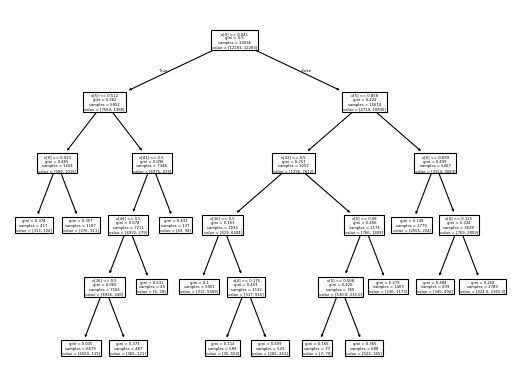

In [608]:
from sklearn.tree import plot_tree
from sklearn import tree

tree.plot_tree(clf_dt)

In [609]:
clf_dt.feature_importances_

array([0.67348766, 0.        , 0.        , 0.        , 0.01476238,
       0.24373353, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01807166, 0.        , 0.        , 0.        ,
       0.        , 0.01392133, 0.02835512, 0.        , 0.00766832,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [610]:
feature_names = df_preprocessed.drop(columns=['subscribed']).columns.tolist()
r = tree.export_text(clf_dt, feature_names=feature_names)
print(r)

|--- duration <= 0.04
|   |--- nr.employed <= 0.51
|   |   |--- duration <= 0.02
|   |   |   |--- class: 0
|   |   |--- duration >  0.02
|   |   |   |--- class: 1
|   |--- nr.employed >  0.51
|   |   |--- month_mar <= 0.50
|   |   |   |--- month_oct <= 0.50
|   |   |   |   |--- month_apr <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- month_apr >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- month_oct >  0.50
|   |   |   |   |--- class: 1
|   |   |--- month_mar >  0.50
|   |   |   |--- class: 1
|--- duration >  0.04
|   |--- nr.employed <= 0.86
|   |   |--- month_may <= 0.50
|   |   |   |--- month_apr <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- month_apr >  0.50
|   |   |   |   |--- euribor3m <= 0.17
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- euribor3m >  0.17
|   |   |   |   |   |--- class: 0
|   |   |--- month_may >  0.50
|   |   |   |--- duration <= 0.08
|   |   |   |   |--- nr.employed <= 0.51
|   |   |   |   |   |--- class: 1
|   | 

In [611]:
# Print the number of features in df_num
print(df_preprocessed.shape)
print(clf_dt.n_features_in_)  

feature_names = df_preprocessed.columns[:clf_dt.n_features_in_].tolist()  
r = tree.export_text(clf_dt, feature_names=feature_names)
print(r)

(26360, 63)
62
|--- duration <= 0.04
|   |--- nr.employed <= 0.51
|   |   |--- duration <= 0.02
|   |   |   |--- class: 0
|   |   |--- duration >  0.02
|   |   |   |--- class: 1
|   |--- nr.employed >  0.51
|   |   |--- month_jun <= 0.50
|   |   |   |--- month_nov <= 0.50
|   |   |   |   |--- contact_telephone <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- contact_telephone >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- month_nov >  0.50
|   |   |   |   |--- class: 1
|   |   |--- month_jun >  0.50
|   |   |   |--- class: 1
|--- duration >  0.04
|   |--- nr.employed <= 0.86
|   |   |--- month_mar <= 0.50
|   |   |   |--- contact_telephone <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- contact_telephone >  0.50
|   |   |   |   |--- euribor3m <= 0.17
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- euribor3m >  0.17
|   |   |   |   |   |--- class: 0
|   |   |--- month_mar >  0.50
|   |   |   |--- duration <= 0.08
|   |   |   |   |--- nr.employed <

[[6040  979]
 [ 120  769]]


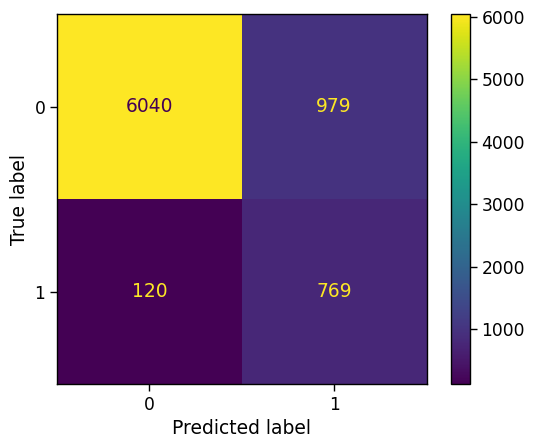

In [612]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mat = confusion_matrix(y_test, y_pred_dt)
print(mat)

disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=clf_dt.classes_)
disp.plot()

In [613]:
clf_dt.score(X_test, y_test)

0.861026808295397

The AUC is 0.930


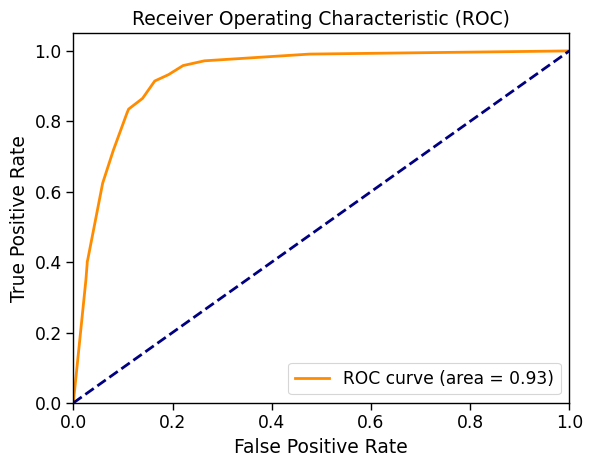

In [614]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict the probabilities
y_probs_dt = clf_dt.predict_proba(X_test)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
auc_dt = roc_auc_score(y_test, y_probs_dt)
print(f'The AUC is {auc_dt:.3f}')

plt.figure()
lw = 2
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Validation set evaluation


Classification Report on Validation Set (Decision Tree):
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      4094
           1       0.46      0.87      0.60       519

    accuracy                           0.87      4613
   macro avg       0.72      0.87      0.76      4613
weighted avg       0.92      0.87      0.89      4613

Confusion Matrix on Validation Set:



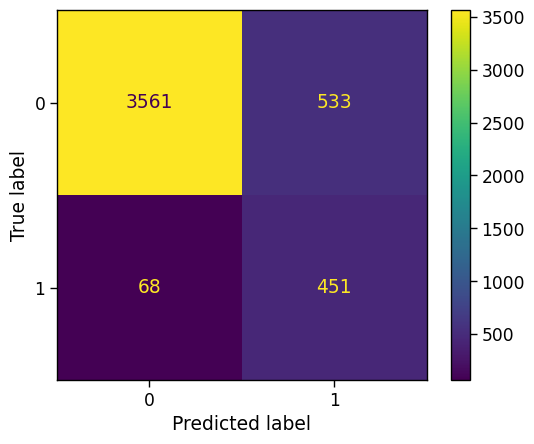

In [615]:
from sklearn.metrics import classification_report, confusion_matrix

y_validate_pred_dt = clf_dt.predict(X_validate)

print("\nClassification Report on Validation Set (Decision Tree):\n", classification_report(y_validate, y_validate_pred_dt))
print("Confusion Matrix on Validation Set:\n")
mat=confusion_matrix(y_validate, y_validate_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=clf_dt.classes_)
disp.plot()

The AUC is 0.930


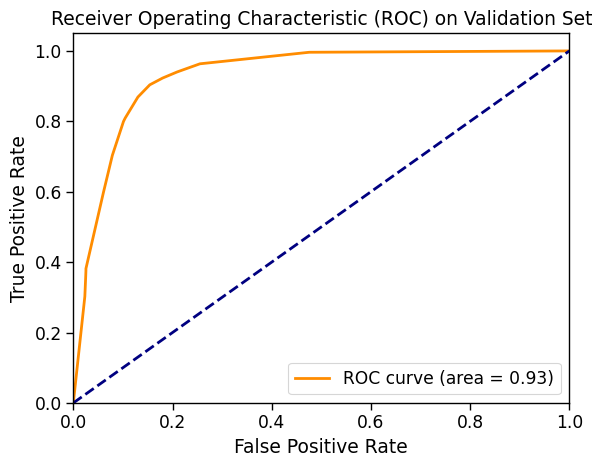

In [616]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs_dt = clf_dt.predict_proba(X_validate)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_validate, y_probs_dt)
auc_dt = roc_auc_score(y_validate, y_probs_dt)
print(f'The AUC is {auc_dt:.3f}')

plt.figure()
lw = 2
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) on Validation Set')
plt.legend(loc="lower right")
plt.show()

In [617]:
clf_dt.score(X_validate, y_validate)

0.8697160199436376

### k-NN

In [618]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 2)
clf_knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=2)

In [240]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    "n_neighbors": range(1, 10),  
}

grid_search_knn = GridSearchCV(
    estimator=clf_knn,
    param_grid=param_grid,
    scoring="f1_macro",  
    cv=5,             
    verbose=1,
    n_jobs=-1          
)

grid_search_knn.fit(X_train_smote, y_train_smote)

print("\nBest parameters found:", grid_search_knn.best_params_)
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameters found: {'n_neighbors': 2}


In [619]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_knn, digits=3))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0      0.928     0.901     0.914      7019
           1      0.364     0.447     0.401       889

    accuracy                          0.850      7908
   macro avg      0.646     0.674     0.658      7908
weighted avg      0.864     0.850     0.857      7908



In [620]:
clf_knn.classes_

# Make predictions for the test set
y_pred_knn = clf_knn.predict(X_test)

[[0.80020233 0.08737987]
 [0.06322711 0.04919069]]


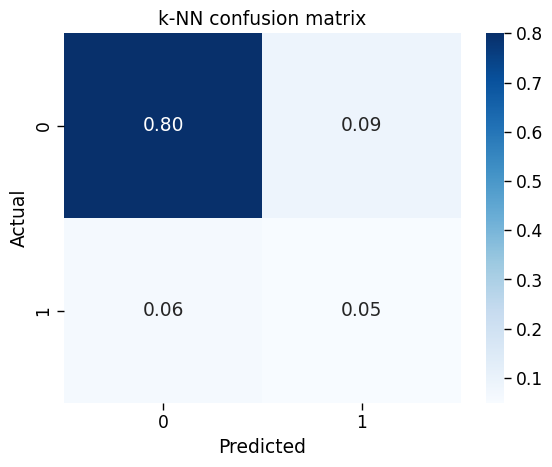

In [621]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred_knn, normalize="all")
print(mat)

sns.heatmap(mat, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("k-NN confusion matrix")
plt.show()

In [622]:
clf_knn.score(X_test, y_test)

0.8493930197268589

The AUC is 0.670


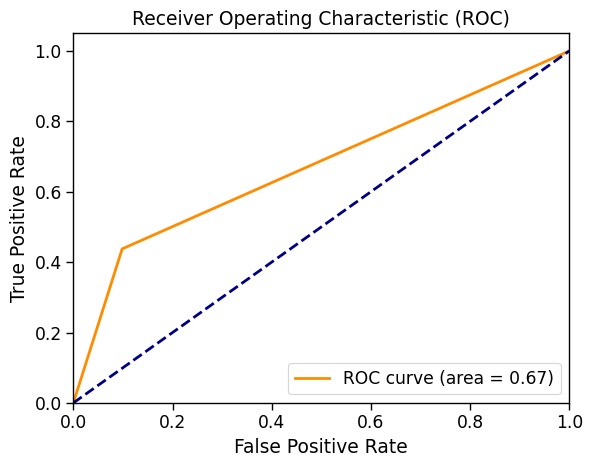

In [623]:
y_probs_knn = clf_knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)
print(f'The AUC is {auc_knn:.3f}')

plt.figure()
lw = 2
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Validation set evaluation

In [624]:
y_validate_pred_knn = clf_knn.predict(X_validate)

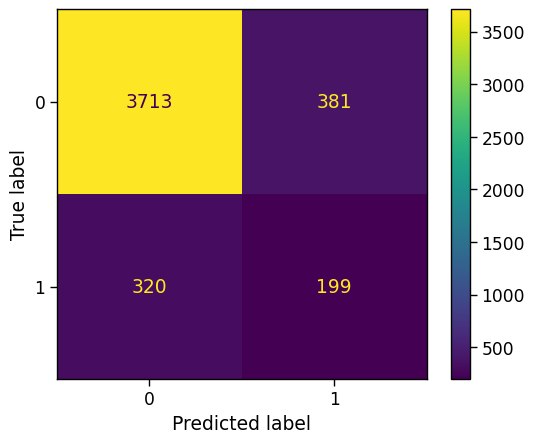

In [625]:
cm = confusion_matrix(y_validate, y_validate_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()

The AUC is 0.721


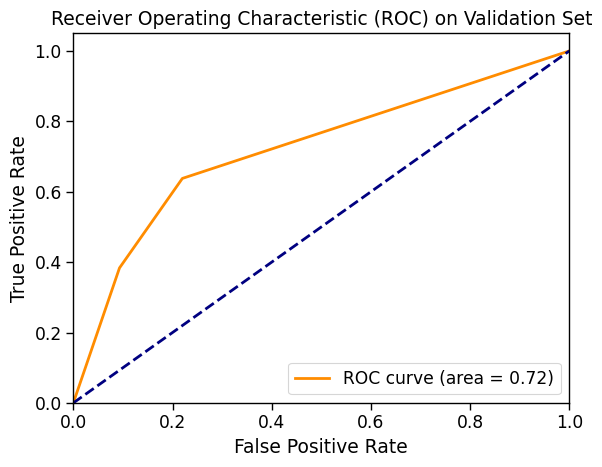

In [626]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs_knn_val = clf_knn.predict_proba(X_validate)[:, 1]

# Compute ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_validate, y_probs_knn_val)
auc_dt = roc_auc_score(y_validate, y_probs_knn_val)
print(f'The AUC is {auc_dt:.3f}')

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) on Validation Set')
plt.legend(loc="lower right")
plt.show()

In [627]:
print("\nClassification Report on Validation Set:\n", classification_report(y_validate, y_validate_pred_knn, digits=3))


Classification Report on Validation Set:
               precision    recall  f1-score   support

           0      0.921     0.907     0.914      4094
           1      0.343     0.383     0.362       519

    accuracy                          0.848      4613
   macro avg      0.632     0.645     0.638      4613
weighted avg      0.856     0.848     0.852      4613



In [628]:
clf_knn.score(X_validate, y_validate)

0.8480381530457403

### Random forest

In [758]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=20, n_estimators=100, max_features="sqrt", oob_score=True)
clf_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, oob_score=True)

In [726]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=clf_rf, 
    param_grid=param_grid, 
    cv=5,
    scoring="f1_macro"
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=20, oob_score=True)


In [749]:
print(clf_rf) 

print("Feature importantce:", clf_rf.feature_importances_)
print("oob score: {:.3f}".format(clf_rf.oob_score_))

RandomForestClassifier(oob_score=True)
Feature importantce: [3.27336617e-01 2.99932337e-02 1.48374522e-02 5.84719441e-02
 1.06513449e-01 8.63044269e-02 8.69620286e-03 1.04883302e-02
 2.71895592e-03 2.02101458e-03 4.61695451e-03 3.06924002e-03
 2.60910270e-03 5.15972998e-03 2.54595125e-03 6.55511788e-03
 2.04344918e-03 5.98796279e-03 9.20772962e-03 8.06135351e-03
 5.98555881e-03 3.12424076e-03 7.71698516e-03 7.37507743e-03
 2.29661794e-05 5.72380794e-03 8.06259892e-03 7.49501999e-03
 1.52555127e-02 8.30188201e-06 9.47549099e-03 8.76024763e-03
 6.14840586e-03 6.24557635e-03 1.04181321e-02 1.72252821e-02
 5.92435612e-03 4.04085539e-03 6.52553090e-04 5.28268197e-03
 4.40996817e-03 3.16454627e-03 2.32588528e-02 4.13539198e-03
 3.28620405e-03 1.02478479e-03 8.55970361e-03 9.50316677e-03
 8.97188417e-03 8.07997122e-03 7.49672104e-03 6.84178518e-03
 9.95024354e-03 8.42031845e-03 7.60306280e-03 7.43878516e-03
 7.01924927e-03 7.52320884e-03 8.67931239e-03 7.04681048e-03
 7.96775729e-03 7.4364022

In [750]:
clf_rf.score(X_test, y_test)

0.9018715225088518

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7019
           1       0.55      0.65      0.60       889

    accuracy                           0.90      7908
   macro avg       0.75      0.79      0.77      7908
weighted avg       0.91      0.90      0.91      7908



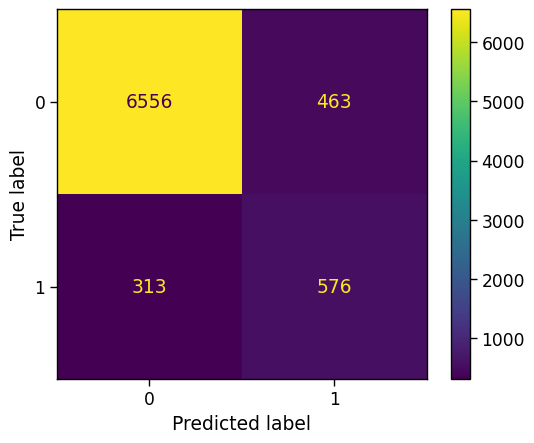

In [751]:
y_pred_rf = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()

The AUC is 0.938


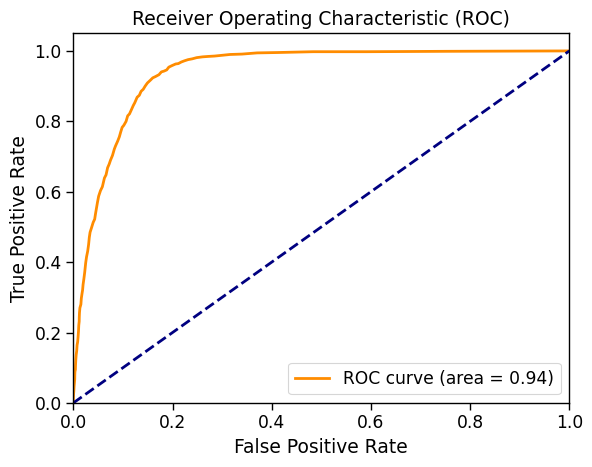

In [752]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs_rf = clf_rf.predict_proba(X_test)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf) 
auc_rf = roc_auc_score(y_test, y_probs_rf)    
print(f'The AUC is {auc_rf:.3f}')

plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Evaluating random forest model on the validation set

In [753]:
y_validate_pred_rf = clf_rf.predict(X_validate)

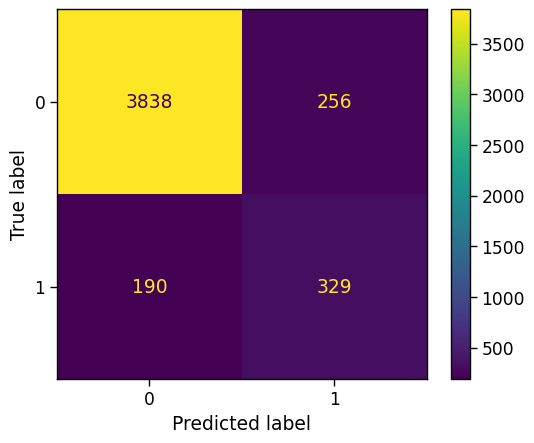

In [754]:
cm = confusion_matrix(y_validate, y_validate_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()

The AUC is 0.937


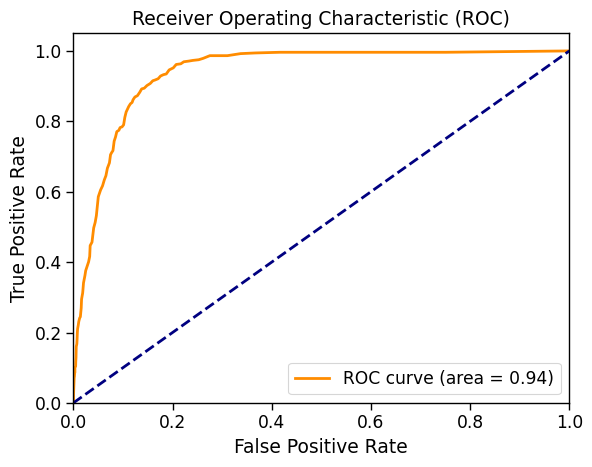

In [755]:
y_probs_rf_validate = clf_rf.predict_proba(X_validate)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(y_validate, y_probs_rf_validate) 
auc_rf = roc_auc_score(y_validate, y_probs_rf_validate)    
print(f'The AUC is {auc_rf:.3f}')

plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [756]:
from sklearn.metrics import classification_report

print("Validation set classification report:")
print(classification_report(y_validate, y_validate_pred_rf, digits=3))

Validation set classification report:
              precision    recall  f1-score   support

           0      0.953     0.937     0.945      4094
           1      0.562     0.634     0.596       519

    accuracy                          0.903      4613
   macro avg      0.758     0.786     0.771      4613
weighted avg      0.909     0.903     0.906      4613



In [757]:
clf_rf.score(X_validate, y_validate)

0.9033167136353782

### Support Vector Machines

In [639]:
from sklearn.svm import NuSVC

clf_svm = NuSVC(nu=0.1, kernel='rbf', gamma='scale', probability=True) 
clf_svm.fit(X_train_smote, y_train_smote)

NuSVC(nu=0.1, probability=True)

In [ ]:
# HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto', uniform(0.01, 1)]
}


random_search = RandomizedSearchCV(
    estimator=clf_svm,
    param_distributions=param_grid,
    n_iter=20, 
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

In [640]:
print("Numbers of support vectors for each class:", clf_svm.n_support_)
print("Support vector indexes in the training set:", clf_svm.support_)
print("Support vectors in the training set:", clf_svm.support_vectors_.shape)

Numbers of support vectors for each class: [2453 1516]
Support vector indexes in the training set: [    0     2     6 ... 24183 24505 24560]
Support vectors in the training set: (3969, 62)


In [641]:
y_pred_svm = clf_svm.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7019
           1       0.59      0.40      0.48       889

    accuracy                           0.90      7908
   macro avg       0.76      0.68      0.71      7908
weighted avg       0.89      0.90      0.89      7908



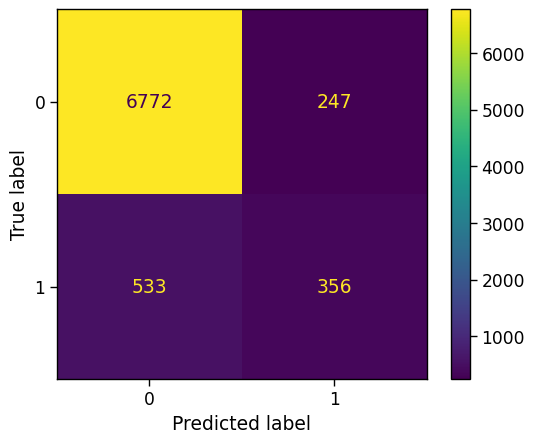

In [642]:
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_svm.classes_)
disp.plot()

The AUC for Class 1 is 0.887


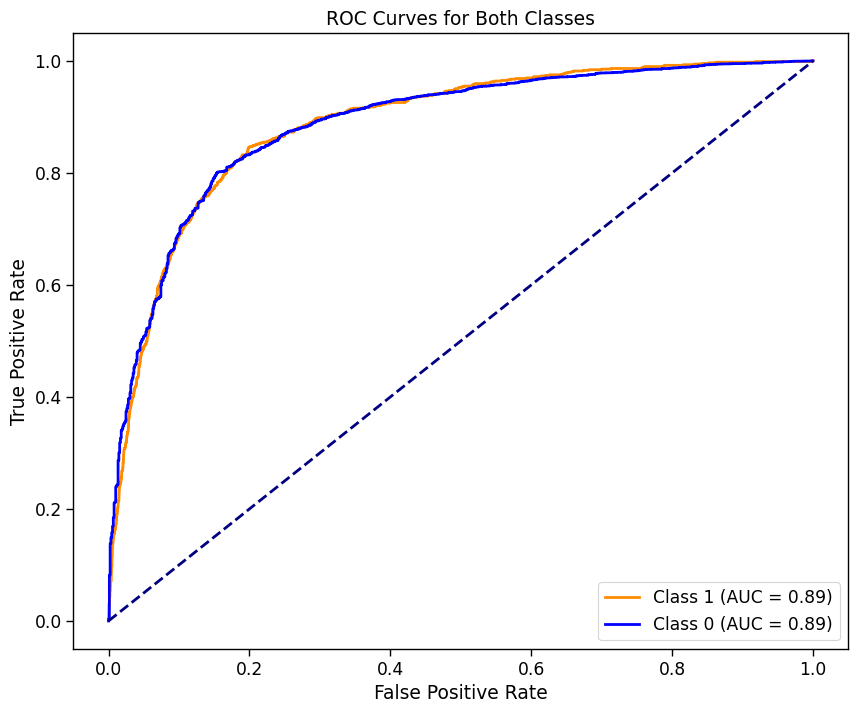

In [643]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs_svm = clf_svm.predict_proba(X_test)  
y_probs_positive = y_probs_svm[:, 1]  

auc_svm = roc_auc_score(y_test, y_probs_positive)
print(f'The AUC for Class 1 is {auc_svm:.3f}')

# Evaluate for class '1' as positive
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs_svm[:, 1], pos_label=1)
auc_1 = roc_auc_score(y_test, y_probs_svm[:, 1])

# Evaluate for class '0' as positive
fpr_0, tpr_0, _ = roc_curve(1 - y_test, y_probs_svm[:, 0], pos_label=1)
auc_0 = roc_auc_score(1 - y_test, y_probs_svm[:, 0])

plt.figure(figsize=(10, 8))
plt.plot(fpr_1, tpr_1, label=f"Class 1 (AUC = {auc_1:.2f})", color="darkorange", lw=2)
plt.plot(fpr_0, tpr_0, label=f"Class 0 (AUC = {auc_0:.2f})", color="blue", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="navy", lw=2) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Both Classes")
plt.legend(loc="lower right")
plt.show()

#### Validation set evaluation

In [644]:
y_validate_pred_svm = clf_svm.predict(X_validate)

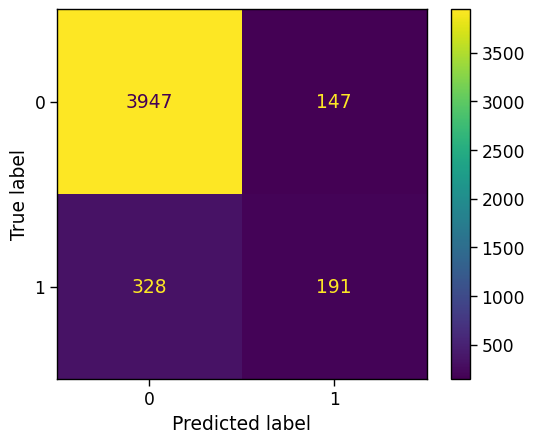

In [645]:
cm = confusion_matrix(y_validate, y_validate_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()

The AUC for Class 1 is 0.885


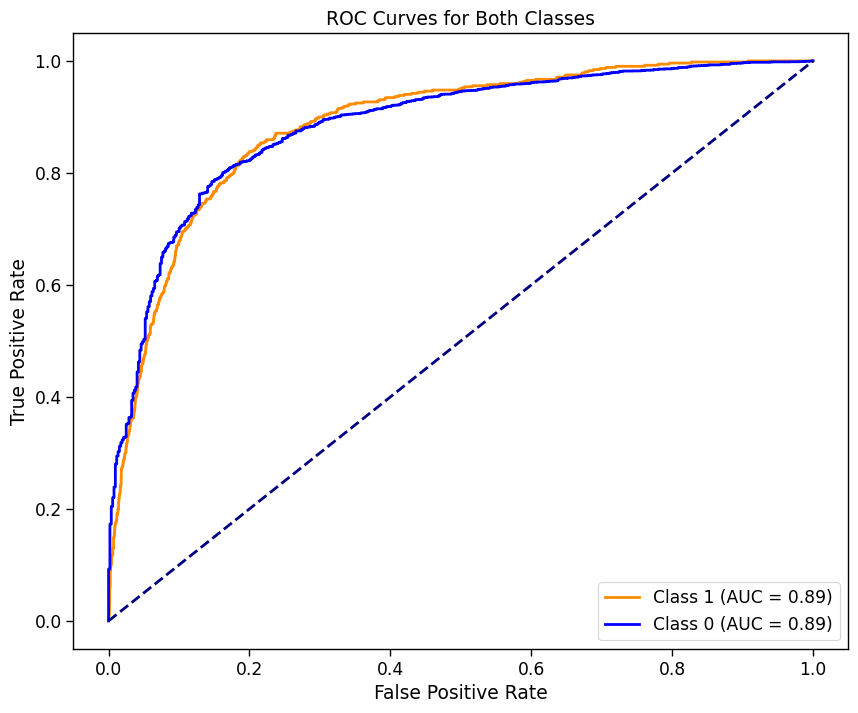

In [646]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs_svm_validate = clf_svm.predict_proba(X_validate)  
y_probs_positive = y_probs_svm_validate[:, 1]  

# Calculate the AUC score for the positive class
auc_svm = roc_auc_score(y_validate, y_probs_positive)
print(f'The AUC for Class 1 is {auc_svm:.3f}')

# Evaluate for class '1' as positive
fpr_1, tpr_1, _ = roc_curve(y_validate, y_probs_svm_validate[:, 1], pos_label=1)
auc_1 = roc_auc_score(y_validate, y_probs_svm_validate[:, 1])

# Evaluate for class '0' as positive
fpr_0, tpr_0, _ = roc_curve(1 - y_validate, y_probs_svm_validate[:, 0], pos_label=1)
auc_0 = roc_auc_score(1 - y_validate, y_probs_svm_validate[:, 0])

plt.figure(figsize=(10, 8))
plt.plot(fpr_1, tpr_1, label=f"Class 1 (AUC = {auc_1:.2f})", color="darkorange", lw=2)
plt.plot(fpr_0, tpr_0, label=f"Class 0 (AUC = {auc_0:.2f})", color="blue", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="navy", lw=2) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Both Classes")
plt.legend(loc="lower right")
plt.show()

In [647]:
print("\nClassification Report on Validation Set:\n", classification_report(y_validate, y_validate_pred_svm))


Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      4094
           1       0.57      0.37      0.45       519

    accuracy                           0.90      4613
   macro avg       0.74      0.67      0.69      4613
weighted avg       0.88      0.90      0.89      4613



In [648]:
clf_svm.score(X_validate, y_validate)

0.8970301322349881

### Neural network

In [649]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(hidden_layer_sizes=(100,50,30,20,20), early_stopping=True,
                    validation_fraction=0.2,
                    verbose=True)
clf_nn.fit(X_train_smote, y_train_smote)

Iteration 1, loss = 0.47136970
Validation score: 0.913512
Iteration 2, loss = 0.18177308
Validation score: 0.933659
Iteration 3, loss = 0.14444558
Validation score: 0.936915
Iteration 4, loss = 0.13093559
Validation score: 0.943630
Iteration 5, loss = 0.13114654
Validation score: 0.942409
Iteration 6, loss = 0.12328693
Validation score: 0.940781
Iteration 7, loss = 0.11563009
Validation score: 0.941392
Iteration 8, loss = 0.11415918
Validation score: 0.941799
Iteration 9, loss = 0.11009291
Validation score: 0.942816
Iteration 10, loss = 0.10382422
Validation score: 0.942613
Iteration 11, loss = 0.10298316
Validation score: 0.936711
Iteration 12, loss = 0.10778994
Validation score: 0.942816
Iteration 13, loss = 0.09449385
Validation score: 0.943020
Iteration 14, loss = 0.09609886
Validation score: 0.940374
Iteration 15, loss = 0.09722932
Validation score: 0.942613
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50, 30, 20, 20),
              validation_fraction=0.2, verbose=True)

In [650]:
# Mean accuracy 
clf_nn.score(X_test, y_test)

0.9042741527567021

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7019
           1       0.60      0.43      0.50       889

    accuracy                           0.90      7908
   macro avg       0.77      0.70      0.72      7908
weighted avg       0.89      0.90      0.90      7908



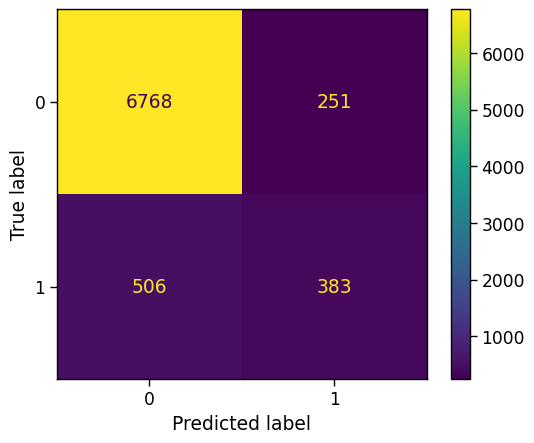

In [651]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = clf_nn.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

The AUC for Class 1 is 0.913


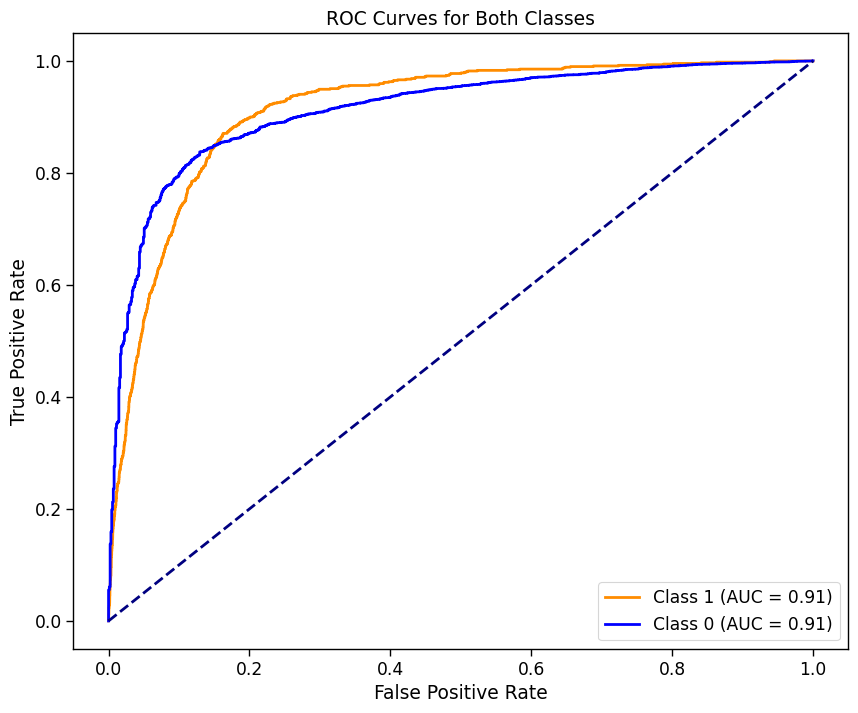

In [652]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs_nn = clf_nn.predict_proba(X_test)  
y_probs_positive = y_probs_nn[:, 1]  

# Calculate the AUC score for the positive class
auc_nn = roc_auc_score(y_test, y_probs_positive)
print(f'The AUC for Class 1 is {auc_nn:.3f}')

# Evaluate for class '1' as positive
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs_nn[:, 1], pos_label=1)
auc_1 = roc_auc_score(y_test, y_probs_nn[:, 1])

# Evaluate for class '0' as positive
fpr_0, tpr_0, _ = roc_curve(1 - y_test, y_probs_nn[:, 0], pos_label=1)
auc_0 = roc_auc_score(1 - y_test, y_probs_nn[:, 0])

plt.figure(figsize=(10, 8))
plt.plot(fpr_1, tpr_1, label=f"Class 1 (AUC = {auc_1:.2f})", color="darkorange", lw=2)
plt.plot(fpr_0, tpr_0, label=f"Class 0 (AUC = {auc_0:.2f})", color="blue", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="navy", lw=2) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Both Classes")
plt.legend(loc="lower right")
plt.show()

#### Validation set evaluation

In [653]:
y_validate_pred_nn = clf_nn.predict(X_validate)

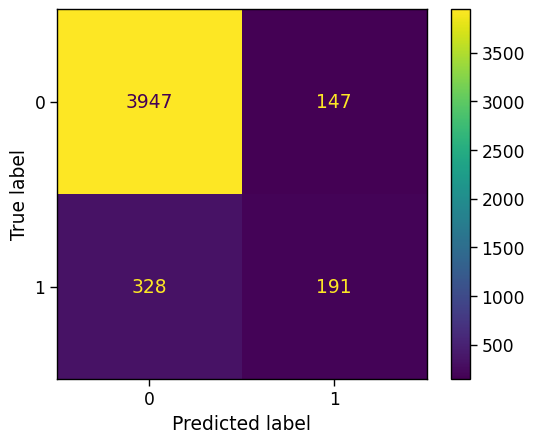

In [654]:
cm = confusion_matrix(y_validate, y_validate_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_svm.classes_)
disp.plot()

The AUC for Class 1 is 0.900


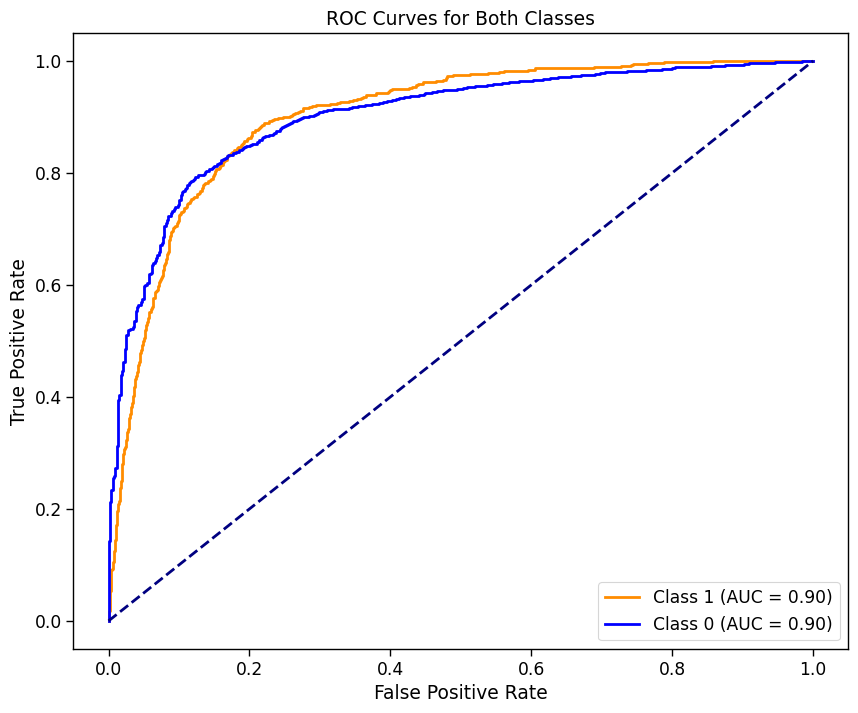

In [655]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs_nn = clf_nn.predict_proba(X_validate)  
y_probs_positive = y_probs_nn[:, 1]  

# Calculate the AUC score for the positive class
auc_nn = roc_auc_score(y_validate, y_probs_positive)
print(f'The AUC for Class 1 is {auc_nn:.3f}')

# Evaluate for class '1' as positive
fpr_1, tpr_1, _ = roc_curve(y_validate, y_probs_nn[:, 1], pos_label=1)
auc_1 = roc_auc_score(y_validate, y_probs_nn[:, 1])

# Evaluate for class '0' as positive
fpr_0, tpr_0, _ = roc_curve(1 - y_validate, y_probs_nn[:, 0], pos_label=1)
auc_0 = roc_auc_score(1 - y_validate, y_probs_nn[:, 0])

plt.figure(figsize=(10, 8))
plt.plot(fpr_1, tpr_1, label=f"Class 1 (AUC = {auc_1:.2f})", color="darkorange", lw=2)
plt.plot(fpr_0, tpr_0, label=f"Class 0 (AUC = {auc_0:.2f})", color="blue", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="navy", lw=2) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Both Classes")
plt.legend(loc="lower right")
plt.show()

In [656]:
print("\nClassification Report on Validation Set:\n", classification_report(y_validate, y_validate_pred_nn, digits=3))


Classification Report on Validation Set:
               precision    recall  f1-score   support

           0      0.925     0.967     0.946      4094
           1      0.596     0.382     0.465       519

    accuracy                          0.901      4613
   macro avg      0.761     0.674     0.706      4613
weighted avg      0.888     0.901     0.892      4613



In [657]:
clf_nn.score(X_validate, y_validate)

0.9013657056145675

### Classification report

In [199]:
from sklearn.metrics import classification_report

# For Decision Tree
y_pred_dt = clf_dt.predict(X_test) 
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt, digits=3))

# For KNN
y_pred_knn = clf_knn.predict(X_test) 
print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_knn, digits=3))

# For Random Forest
y_pred_rf = clf_rf.predict(X_test) 
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf, digits=3))

# For Support Vector Machines
y_pred_svm = clf_svm.predict(X_test)
print("Support Vector Machine Classifier Report:")
print(classification_report(y_test, y_pred_svm, digits=3))

# For Neural network
y_pred_nn = clf_nn.predict(X_test)
print("Neural Network Classifier Report:")
print(classification_report(y_test, y_pred_knn, digits=3))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0      0.982     0.846     0.909      7021
           1      0.419     0.880     0.568       887

    accuracy                          0.850      7908
   macro avg      0.701     0.863     0.738      7908
weighted avg      0.919     0.850     0.871      7908

KNN Classifier Report:
              precision    recall  f1-score   support

           0      0.923     0.907     0.915      7021
           1      0.350     0.398     0.372       887

    accuracy                          0.850      7908
   macro avg      0.636     0.652     0.643      7908
weighted avg      0.858     0.850     0.854      7908

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0      0.953     0.932     0.942      7021
           1      0.542     0.634     0.584       887

    accuracy                          0.899      7908
   macro avg      0.747     0.783     0

### Validation set classification report

In [741]:
# Decision Tree
y_validate_pred_dt = clf_dt.predict(X_validate)
print("\nClassification Report on Validation Set for DT")
print(classification_report(y_validate, y_validate_pred_dt, digits=3))
print("Mean average: ", clf_dt.score(X_validate, y_validate))

# KNN
y_validate_pred_knn = clf_knn.predict(X_validate)
print("\nClassification Report on Validation Set for k-NN")
print(classification_report(y_validate, y_validate_pred_knn, digits=3))
print("Mean average: ", clf_knn.score(X_validate, y_validate))

# Random Forest
y_validate_pred_rf = clf_rf.predict(X_validate)
print("\nClassification Report on Validation Set for RF")
print(classification_report(y_validate, y_validate_pred_rf, digits=3))
print("Mean average: ", clf_rf.score(X_validate, y_validate))

# Support Vector Machine
y_validate_pred_svm = clf_svm.predict(X_validate)
print("\nClassification Report on Validation Set for SVM")
print(classification_report(y_validate, y_validate_pred_svm, digits=3))
print("Mean average: ", clf_svm.score(X_validate, y_validate))

# Neural Network
y_validate_pred_nn = clf_nn.predict(X_validate)
print("\nClassification Report on Validation Set for NN")
print(classification_report(y_validate, y_validate_pred_nn, digits=3))
print("Mean average: ", clf_nn.score(X_validate, y_validate))


Classification Report on Validation Set for DT
              precision    recall  f1-score   support

           0      0.981     0.870     0.922      4094
           1      0.458     0.869     0.600       519

    accuracy                          0.870      4613
   macro avg      0.720     0.869     0.761      4613
weighted avg      0.922     0.870     0.886      4613

Mean average:  0.8697160199436376

Classification Report on Validation Set for k-NN
              precision    recall  f1-score   support

           0      0.921     0.907     0.914      4094
           1      0.343     0.383     0.362       519

    accuracy                          0.848      4613
   macro avg      0.632     0.645     0.638      4613
weighted avg      0.856     0.848     0.852      4613

Mean average:  0.8480381530457403

Classification Report on Validation Set for RF
              precision    recall  f1-score   support

           0      0.960     0.928     0.944      4094
           1      0.550

## Preproocessing unknown dataset

In [665]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

DATAFILE2 = './Unknown-Dataset.csv'
unknown = pd.read_csv (DATAFILE2)
unknown.head()

,row ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state
0,Row0,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,VIC
1,Row1,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NT
2,Row2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,TAS
3,Row3,50,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NSW
4,Row4,39,management,single,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,ACT


In [666]:
original_unknown = unknown.copy()
original_unknown.head()

,row ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state
0,Row0,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,VIC
1,Row1,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NT
2,Row2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,TAS
3,Row3,50,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NSW
4,Row4,39,management,single,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,ACT


### Missing values

In [667]:
for column in unknown.columns:
    missing_count = unknown[column].isin(['unknown', '?']).sum()
    
    if missing_count > 0:
        print(f"{column} : {missing_count} ")

        missing_percentage = missing_count / len(unknown)
        print(f"{missing_percentage * 100:.2f}% missing")

job : 53 
0.80% missing
marital : 13 
0.20% missing
education : 289 
4.39% missing
default : 1344 
20.39% missing
housing : 151 
2.29% missing
loan : 151 
2.29% missing
pdays : 223 
3.38% missing
emp.var.rate : 141 
2.14% missing
cons.price.idx : 22 
0.33% missing
nr.employed : 403 
6.12% missing


In [671]:
import numpy as np

print(unknown.isnull().sum())
print('---after replacing to NaN---')

for col in unknown.columns:
    if col == 'default':
        continue       
  
    unknown[col].replace(['unknown', '?'], np.nan, inplace=True)

print(unknown.isin(['unknown', '?']).sum())

row ID            0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
state             0
dtype: int64
---after replacing to NaN---
row ID               0
age                  0
job                  0
marital              0
education            0
default           1344
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
state                0
dtype: int64

C:\Users\micha\AppData\Local\Temp\ipykernel_12768\1172836328.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unknown[col].replace(['unknown', '?'], np.nan, inplace=True)


In [672]:
unknown['default'].value_counts()

default
no         5246
unknown    1344
Name: count, dtype: int64

In [673]:
# Handle missing values in categorical columns, perform imputation
unknown['job'] = unknown['job'].fillna(unknown['job'].mode()[0])
unknown['marital'] = unknown['marital'].fillna(unknown['marital'].mode()[0])
# unknown['default'] = unknown['default'].fillna(unknown['default'].mode()[0])
unknown['education'] = unknown['education'].fillna(unknown['education'].mode()[0])
unknown['housing'] = unknown['housing'].fillna(unknown['housing'].mode()[0])
unknown['loan'] = unknown['loan'].fillna(unknown['loan'].mode()[0])

# Check again for any remaining missing values
print(unknown['job'].isin(['unknown', '?']).sum())
print(unknown['marital'].isin(['unknown', '?']).sum())
# print(unknown['default'].isin(['unknown', '?']).sum())
print(unknown['education'].isin(['unknown', '?']).sum())
print(unknown['housing'].isin(['unknown', '?']).sum())
print(unknown['loan'].isin(['unknown', '?']).sum())

0
0
0
0
0


In [674]:
unknown['pdays'] = pd.to_numeric(unknown['pdays'], errors='coerce')

numerical_columns = ['pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for column in numerical_columns:
    unknown[column] = pd.to_numeric(unknown[column], errors='coerce') 
    unknown[column] = unknown[column].fillna(unknown[column].mean())

print(unknown[numerical_columns].isin(['unknown', '?']).sum())

pdays             0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


In [675]:
for column in unknown.columns:
    missing_count = unknown[column].isin(['unknown', '?']).sum()
    
    if missing_count > 0:
        print(f"{column} : {missing_count} ")

        missing_percentage = missing_count / len(unknown)
        print(f"{missing_percentage * 100:.2f}% missing")

default : 1344 
20.39% missing


                age      duration      campaign         pdays      previous  \
count  26360.000000  26360.000000  26360.000000  26360.000000  26360.000000   
mean       0.284642      0.052623      0.028303      0.960575      0.024724   
std        0.129046      0.053591      0.049379      0.189262      0.070076   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.185185      0.020740      0.000000      1.000000      0.000000   
50%        0.259259      0.036397      0.018182      1.000000      0.000000   
75%        0.370370      0.065067      0.036364      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  26360.000000    26360.000000   26360.000000  26360.000000   
mean       0.717364        0.531953       0.429940      0.670771   
std        0.326353        0.224638       0.193276      0.391370   
min        0.000

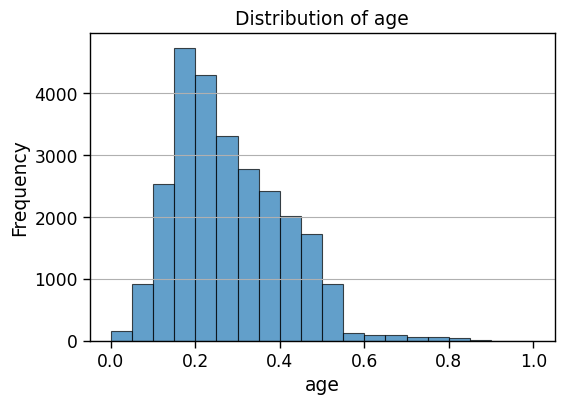

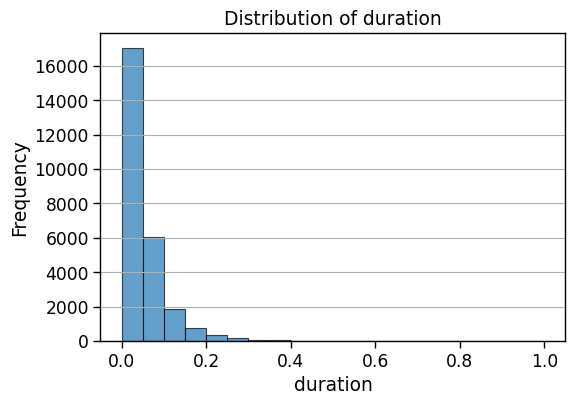

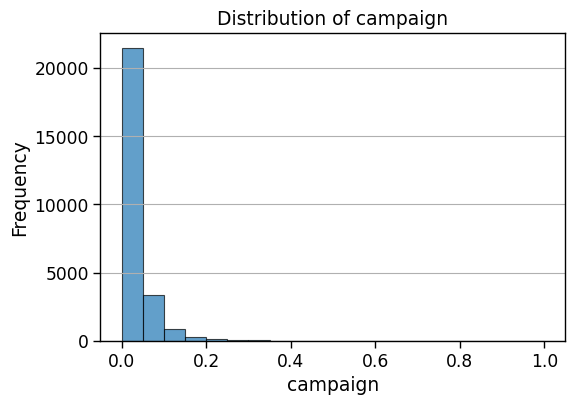

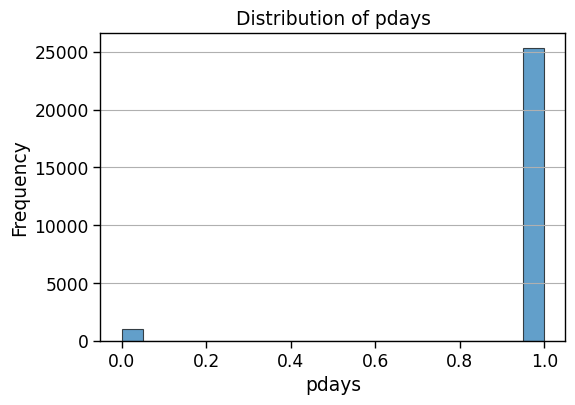

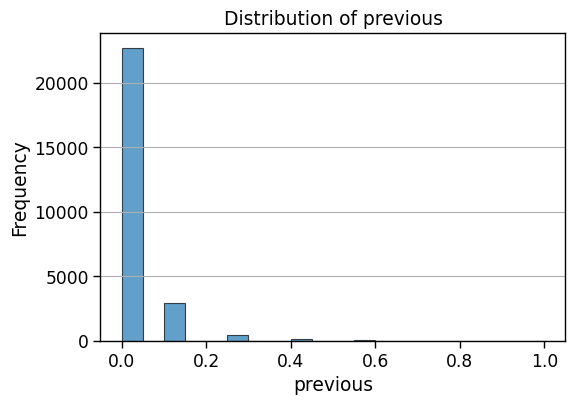

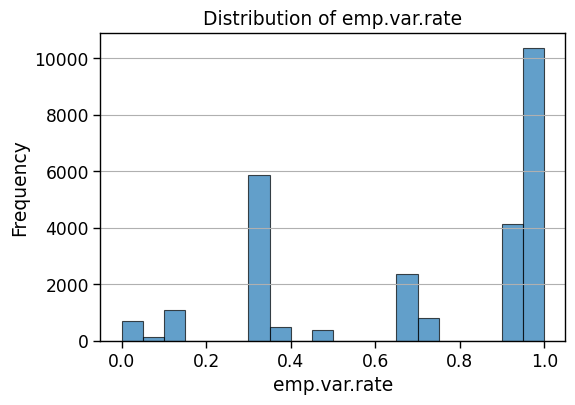

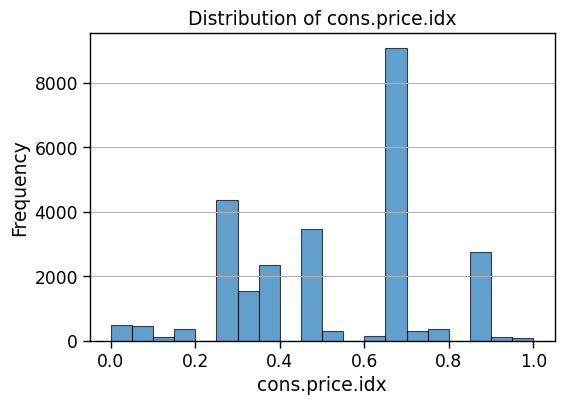

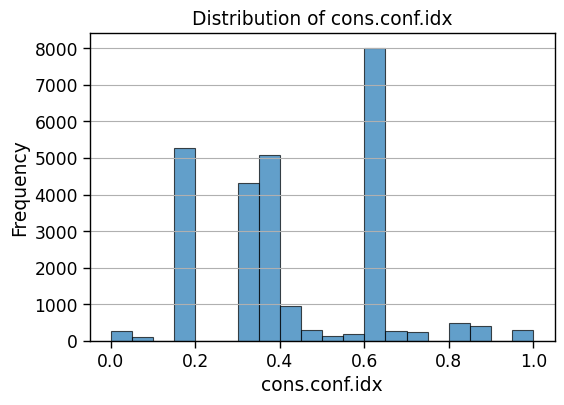

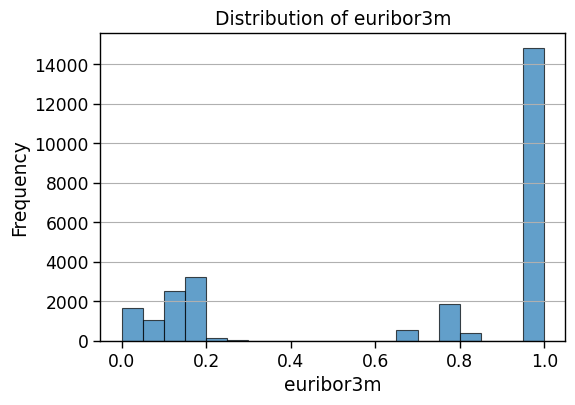

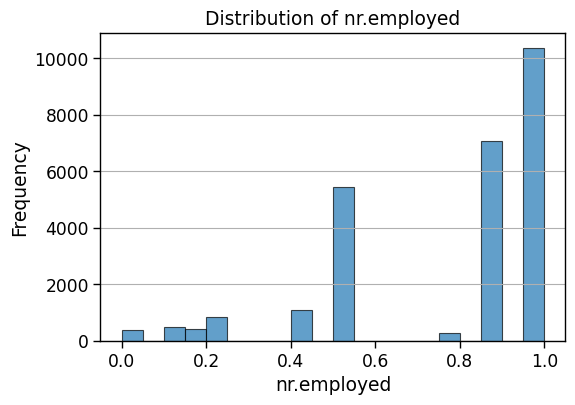

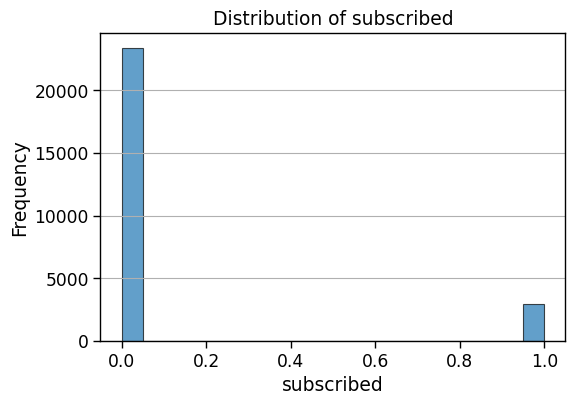

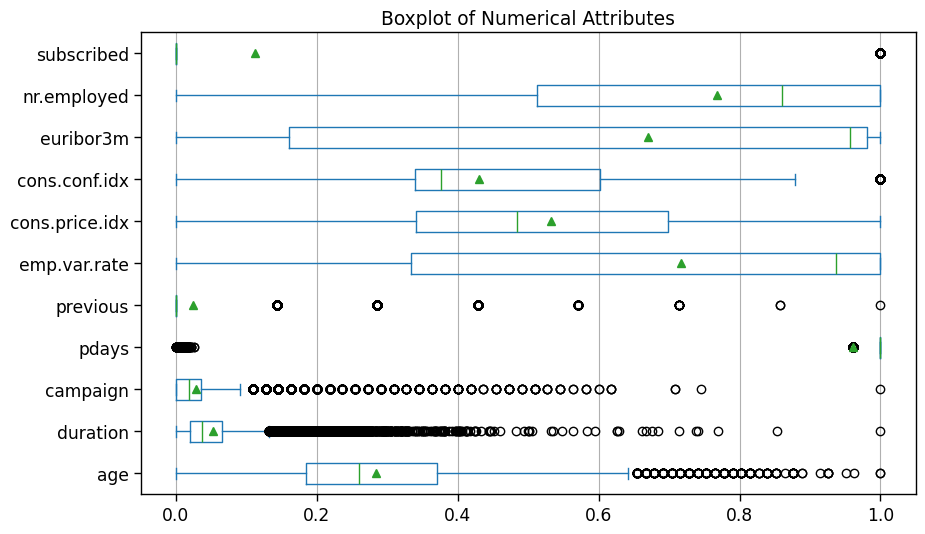

In [676]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histogram and box plot for numerical attributes
numerical_columns = ['age','duration','campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                    'cons.conf.idx', 'euribor3m', 'nr.employed','subscribed']

print(df[numerical_columns].describe())

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

df[numerical_columns].plot(kind='box', figsize=(10, 6), vert=False, showmeans=True)
plt.title("Boxplot of Numerical Attributes")
plt.grid(axis='x')
plt.show()

### Normalisation

In [677]:
from sklearn.preprocessing import MinMaxScaler

attributes_to_normalize =  ['age','duration','campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                    'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = MinMaxScaler()

unknown[attributes_to_normalize] = scaler.fit_transform(unknown[attributes_to_normalize])

print(unknown[attributes_to_normalize].head())

        age  duration  campaign  pdays  previous  emp.var.rate  \
0  0.557143  0.046811       0.0    1.0       0.0        0.9375   
1  0.314286  0.047440       0.0    1.0       0.0        0.9375   
2  0.328571  0.017279       0.0    1.0       0.0        0.9375   
3  0.457143  0.110902       0.0    1.0       0.0        0.9375   
4  0.300000  0.061263       0.0    1.0       0.0        0.9375   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.698753        0.60251    0.95737     0.859735  
1        0.698753        0.60251    0.95737     0.859735  
2        0.698753        0.60251    0.95737     0.859735  
3        0.698753        0.60251    0.95737     0.859735  
4        0.698753        0.60251    0.95737     0.859735  


### One-hot encoding

In [678]:
unknown = unknown.drop(columns=['row ID'])
unknown.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state
0,0.557143,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,VIC
1,0.314286,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,NT
2,0.328571,blue-collar,married,university.degree,unknown,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,TAS
3,0.457143,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,NSW
4,0.300000,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,ACT


In [679]:
from sklearn.preprocessing import OneHotEncoder

oneHot = OneHotEncoder(dtype=int, sparse_output=False)

categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
              'day_of_week', 'poutcome', 'state']

onehot_unknown = oneHot.fit_transform(unknown[categorical])
encoded_columns_unknown = oneHot.get_feature_names_out(categorical)
encoded_unknown = pd.DataFrame(onehot_unknown, columns=encoded_columns_unknown)

In [680]:
encoded_unknown.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_nonexistent,poutcome_success,state_ACT,state_NSW,state_NT,state_QLD,state_SA,state_TAS,state_VIC,state_WA
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [681]:
encoded_unknown.shape

(6590, 55)

In [682]:
encoded_unknown

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_nonexistent,poutcome_success,state_ACT,state_NSW,state_NT,state_QLD,state_SA,state_TAS,state_VIC,state_WA
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6586,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6587,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6588,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [683]:
# Concatenate the dataframe with the one-hot encoded dataframe (encoded categtories)
unknown_combined = pd.concat([unknown, encoded_unknown], axis=1)
# Drop the original categorical columns 
unknown_combined.drop(categorical, axis=1, inplace=True)

df_combined.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,poutcome_nonexistent,poutcome_success,state_ACT,state_NSW,state_NT,state_QLD,state_SA,state_TAS,state_VIC,state_WA
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,0,0,0,0,1,0
1,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,0,0
2,0.345679,0.040260,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,0,0,0,1,0,0
3,0.518519,0.028264,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,1,0,0,0,0,0,0
4,0.296296,0.044124,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,1,0,0,0,0,0,0,0


In [684]:
unknown_combined.shape

(6590, 65)

In [685]:
unknown_combined.dtypes

age          float64
duration     float64
campaign     float64
pdays        float64
previous     float64
              ...   
state_QLD      int32
state_SA       int32
state_TAS      int32
state_VIC      int32
state_WA       int32
Length: 65, dtype: object

In [686]:
unknown_combined.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_unknown',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week

In [687]:
# Based on the linear correlation in the preprocessing of the marketing dataset (df) for model training
# Drop the attributes that has a weak correlation associated with "subscribed" target

weak_columns = ['age', 'campaign', 'cons.price.idx', 'cons.conf.idx']
unknown_preprocessed = unknown_combined.drop(columns=weak_columns)

print("Final unknown dataset:", unknown_preprocessed.columns)

Final unknown dataset: Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'pou

In [688]:
unknown_preprocessed.shape

(6590, 61)

In [689]:
df_preprocessed.shape

(26360, 63)

In [690]:
df_preprocessed.columns

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'subscribed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure'

In [693]:
# Add "default_yes" into the unknown_preprocessed dataframe as the trained model has this attribute
# Set with a placeholder of 0
unknown_preprocessed.insert(loc=0, column='default_yes', value=0)

In [695]:
unknown_preprocessed.shape

(6590, 62)

In [698]:
training_features = ['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'state_ACT', 'state_NSW',
       'state_NT', 'state_QLD', 'state_SA', 'state_TAS', 'state_VIC',
       'state_WA']

unknown_preprocessed = unknown_preprocessed[training_features]

### Prediction

In [715]:
predicted_subscribed = clf_svm.predict(unknown_preprocessed)
unknown['subscribed'] = predicted_subscribed

In [716]:
unknown.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state,subscribed
0,0.557143,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,VIC,0
1,0.314286,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,NT,0
2,0.328571,blue-collar,married,university.degree,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,TAS,0
3,0.457143,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,NSW,0
4,0.300000,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.95737,0.859735,ACT,0


In [717]:
unknown['subscribed'].value_counts()

subscribed
0    5581
1    1009
Name: count, dtype: int64

In [719]:
results = pd.DataFrame({
    'row ID': original_unknown['row ID'], 
    'prediction-subscribed': predicted_subscribed
})
results.to_csv('support-vec-machine-10.csv', index=False)
print("submission file success")  

submission file success
